In [2]:
import datetime
import random

import numpy as np 
# import seaborn as sns  
import matplotlib.pyplot as plt

### Function to simulate Fake Heart Rate data

Returns the heart rate and time stamp 

In [3]:
class FakeHeartRateMonitor():
    def __init__(self):
        self.prev_hr = 60
        self.time_now = datetime.datetime.now()

    def get_heart_rate(self):
        change = random.randint(-2, 2)
        if random.random() < 0.1:  
            change += random.randint(-70, 70)

        new_rate = min(max(self.prev_hr + change, 40), 160)
        
        self.time_now = self.time_now + datetime.timedelta(seconds=1)
        return [new_rate, datetime.datetime.timestamp(self.time_now)]
    
monitor = FakeHeartRateMonitor()

In [4]:
hours = 12
heart_rate_data = np.array([monitor.get_heart_rate() for x in range(hours * 60 * 60)])  # Generate a heart rate for 12 hours with a 1Hz frequency

print(len(heart_rate_data))

43200


In [5]:
window = 60 #set window length in seconds

average_data = []
for i in range(0, len(heart_rate_data) - window, window):
    window_data = heart_rate_data[i : i+window, :]
    avg_hr = np.mean(window_data[:, 0])
    average_data.append([round(avg_hr, 1), window_data[:, 1][0]])

heart_rate_data = average_data

## Line Plot

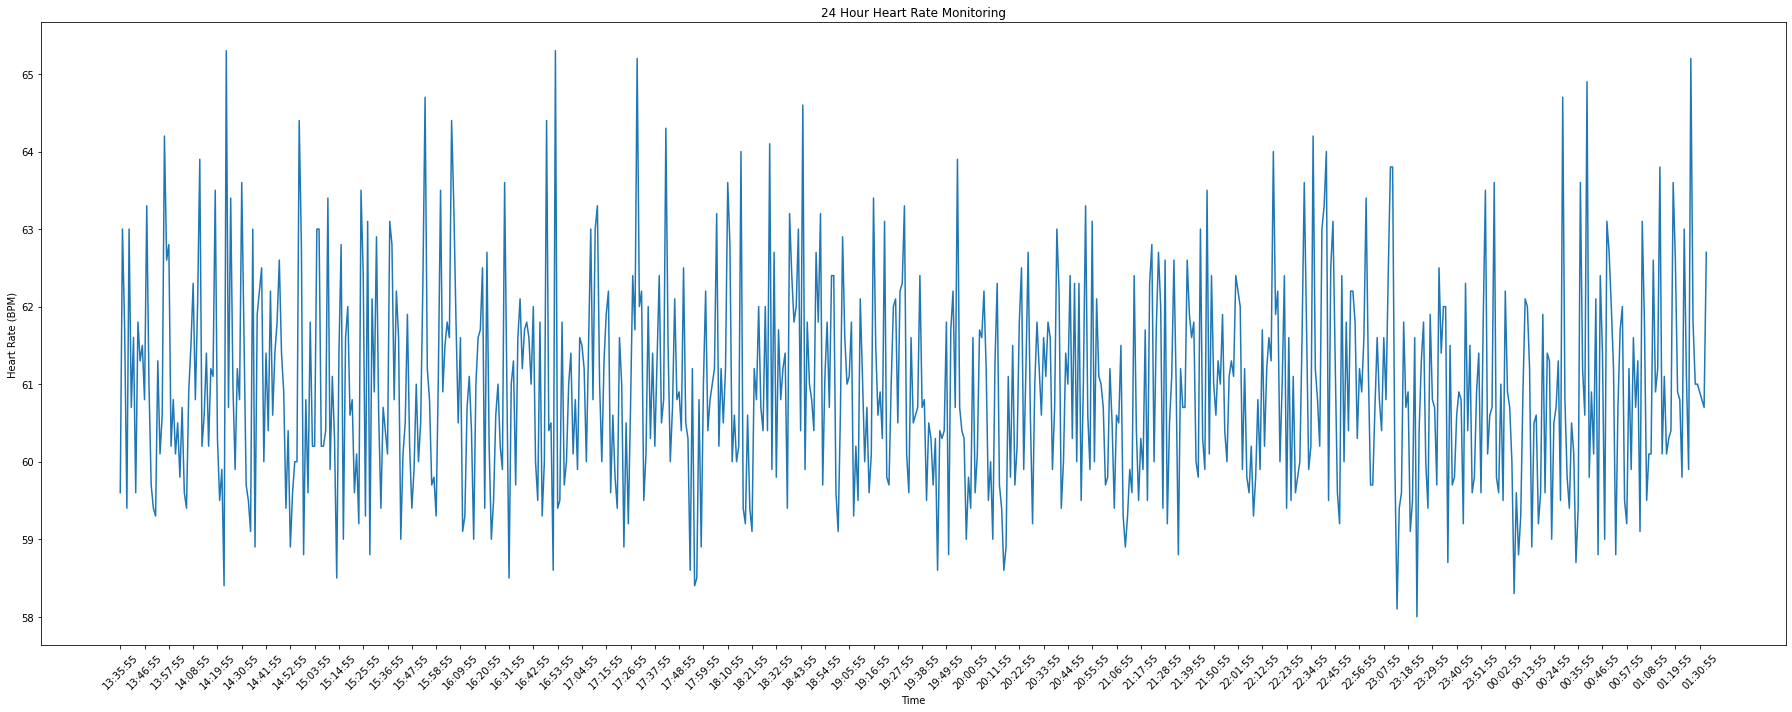

In [6]:
#Convert UTC timestamps to Strings
xaxis = [datetime.datetime.fromtimestamp(x).strftime("%H:%M:%S") for x in np.array(heart_rate_data)[:,1]]   
yaxis = np.array(heart_rate_data)[:,0]

plt.figure(figsize=(25, 10))
plt.plot(xaxis, yaxis) 
#sns.lineplot(y = yaxis, x = xaxis,markers=True)

plt.title('24 Hour Heart Rate Monitoring')
plt.xlabel('Time')
plt.ylabel('Heart Rate (BPM)')
#Set x axis label frequency
plt.xticks(np.array(xaxis)[:: int(len(xaxis) / 60)])   
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Function to save the figure. Can also save by hovering over the plot and pressing the save button in top right corner
# plt.savefig('heart_rate_24hr.png')


## Radial Plot

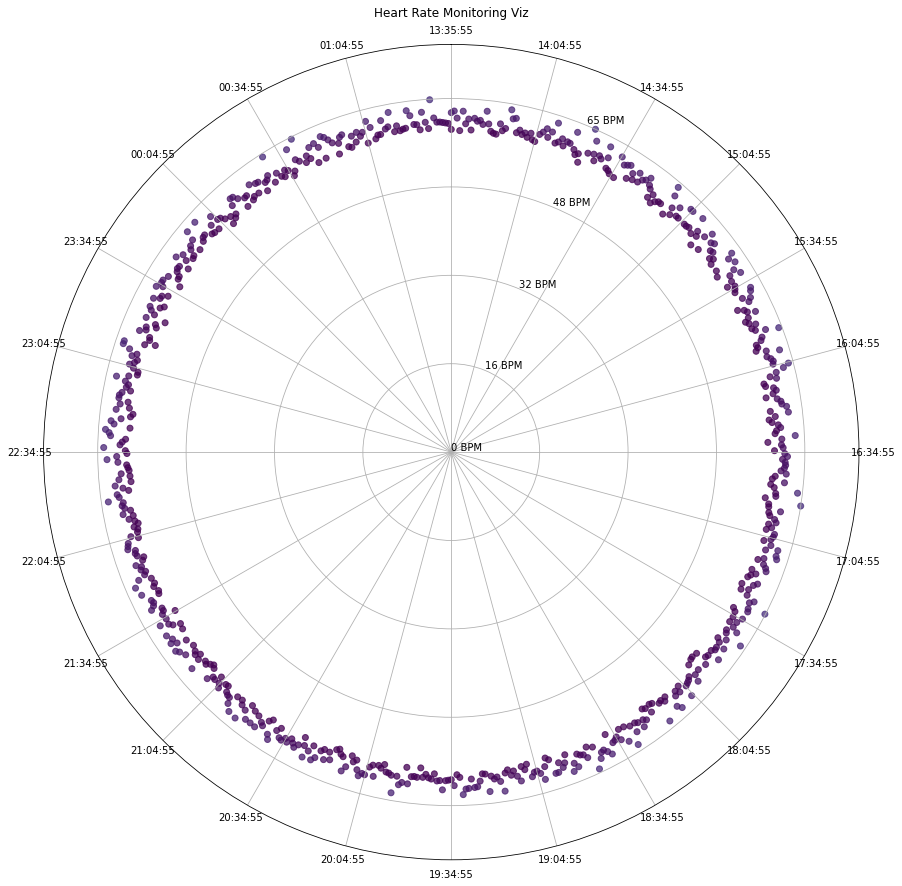

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

timestamps = [datetime.datetime.fromtimestamp(x).strftime("%H:%M:%S") for x in np.array(heart_rate_data)[:,1]]
heart_rates = np.array(heart_rate_data)[:,0]


#Initialise the radial plot
figure, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(15, 15))

#Set the angles to plot each of te heart rate
angles = np.linspace(0, 2*np.pi, len(heart_rates))
        
norm = plt.Normalize(60, 100)
colors = plt.cm.viridis(norm(heart_rates))

# Plot a scatter plot for heart rate vs the angles, alpha sets the transparency the plot
ax.scatter(angles, heart_rates, c=colors, alpha=0.75)

ax.set_theta_zero_location('N')  
ax.set_theta_direction(-1)  

# Limit the x axis (time) label frequency 
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))
ax.set_xticklabels(np.array(timestamps)[np.linspace(0, len(timestamps), 24, endpoint=False).astype('int')])

ax.set_ylim(0, max(heart_rates) + 10)
#Set the labels for Heart Rate
ax.set_yticks(np.linspace(0, max(heart_rates), 5))
ax.set_yticklabels([f"{int(i)} BPM" for i in np.linspace(0, max(heart_rates), 5)])
ax.set_title('Heart Rate Monitoring Viz', va='bottom')
ax.grid(True)
#plt.savefig('heart_rate_24hr.png', facecolor='white', transparent=False)

## Interactive Visualization

In [8]:
# Most likely will need to install this library with..
#!pip install plotly
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=timestamps, y=heart_rates, mode='lines+markers',
                         hoverinfo='y', marker=dict(size=5),
                         line=dict(width=1)))


fig.update_layout(
    title='24-hour Heart Rate Timeline',
    xaxis_title='Time',
    yaxis_title='Heart Rate (bpm)',
    hovermode='x',
    xaxis=dict(
        rangeslider=dict(
            visible=True,
            thickness=0.1
        ),
        type='category'
    ),
    yaxis=dict(
        fixedrange=False
    )
)

fig.show()
